In [221]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [222]:
#Cargar el dataset

df = pd.read_csv('MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


In [223]:
#Eliminamos la columna Application_id, no es relevante para el analisis 

df = df.drop('application_id', axis = 1)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   int64  
 6   work_exp       6194 non-null   int64  
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 393.3+ KB


In [225]:
df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [226]:
# Obtener columnas categoricas
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Valores unicos de cada columna categorica
for col in categorical_cols.columns:
    print(f"Unique values in {col}: {categorical_cols[col].unique()}")

Unique values in gender: ['Female' 'Male']
Unique values in major: ['Business' 'Humanities' 'STEM']
Unique values in race: ['Asian' 'Black' nan 'Hispanic' 'White' 'Other']
Unique values in work_industry: ['Financial Services' 'Investment Management' 'Technology' 'Consulting'
 'Nonprofit/Gov' 'PE/VC' 'Health Care' 'Investment Banking' 'Other'
 'Retail' 'Energy' 'CPG' 'Real Estate' 'Media/Entertainment']
Unique values in admission: ['Admit' nan 'Waitlist']


Label counts:
admission
Admit       900
Waitlist    100
Name: count, dtype: int64
Label percentages:
admission
Admit       90.0%
Waitlist    10.0%
Name: proportion, dtype: object


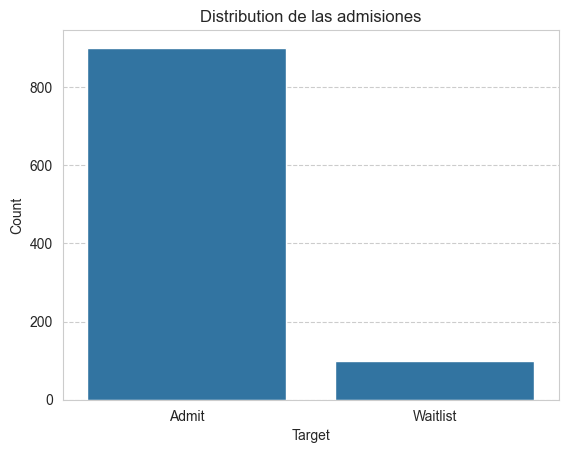

In [227]:
# distribucion de la variable objetivo
distribution = df['admission'].value_counts()

# porcentaje de la distribucion de la variable objetivo
distribution_percentage = df['admission'].value_counts(normalize=True) * 100

print(f'Label counts:\n{distribution}')

#imprimir el porcentaje de distribucion 
distribution_percentage = distribution_percentage.round(2).astype(str) + '%'
print(f'Label percentages:\n{distribution_percentage}')

# muestra la distribucion de la variable objetivo 

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.countplot(x='admission', data=df)
plt.title('Distribution de las admisiones')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### 2 . Limpieza de los datos 

- Lidiar con los datos faltantes
- Tratar datos desequilibrados
- Defina X, y obtenga Dummy en X para datos categóricos
- Dividir datos
- Escalado de datos

In [228]:
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680,5,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710,5,Technology,Admit
3,Male,False,3.47,STEM,Black,690,6,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590,5,Consulting,NaN


In [229]:
#Gender 0,1
# Para facilitar el uso del algortimo cambiamos de 'male' a 1 y 'female' a 0

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Confirmamos si el mapeo funciono
print(df.head())


   gender  international   gpa       major      race  gmat  work_exp  \
0       0          False  3.30    Business     Asian   620         3   
1       1          False  3.28  Humanities     Black   680         5   
2       0           True  3.30    Business       NaN   710         5   
3       1          False  3.47        STEM     Black   690         6   
4       1          False  3.35        STEM  Hispanic   590         5   

           work_industry admission  
0     Financial Services     Admit  
1  Investment Management       NaN  
2             Technology     Admit  
3             Technology       NaN  
4             Consulting       NaN  


In [230]:
#Admission
# 1, Remover entradas de waitlist
df = df[df['admission'] != 'Waitlist']

# 2 Map 'Admit' a 1 y null a 0 

df['admission'] = df['admission'].map({'Admit':1}).fillna(0)

print(df.head())

   gender  international   gpa       major      race  gmat  work_exp  \
0       0          False  3.30    Business     Asian   620         3   
1       1          False  3.28  Humanities     Black   680         5   
2       0           True  3.30    Business       NaN   710         5   
3       1          False  3.47        STEM     Black   690         6   
4       1          False  3.35        STEM  Hispanic   590         5   

           work_industry  admission  
0     Financial Services        1.0  
1  Investment Management        0.0  
2             Technology        1.0  
3             Technology        0.0  
4             Consulting        0.0  


In [231]:
# Balanceo
# Separamos la clases en mayoria y minoria

df_majority = df[df['admission'] == 0] #Clase mayoria (admision = 0)

df_minority = df[df['admission'] == 1] #Clase minoria (admision = 1)

# # Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Sample sin reemplazos 
                                   n_samples=len(df_minority),  # Match clase minoria
                                   random_state=42)  

# Combinar clase minoria con downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])


# Shuffle el dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la distribucion de la clase 

print(df_balanced['admission'].value_counts(),'\n')

print(df_balanced.head())

admission
1.0    900
0.0    900
Name: count, dtype: int64 

   gender  international   gpa       major   race  gmat  work_exp  \
0       1          False  3.25  Humanities  White   670         6   
1       1          False  3.34  Humanities  White   700         4   
2       0          False  3.20        STEM  White   680         6   
3       1           True  3.18    Business    NaN   580         6   
4       1          False  3.33  Humanities  Asian   670         5   

        work_industry  admission  
0       Nonprofit/Gov        1.0  
1          Consulting        1.0  
2       Nonprofit/Gov        0.0  
3          Consulting        0.0  
4  Financial Services        1.0  


In [232]:
# Selección de características y variable objetivo
X = df_balanced.drop('admission', axis = 1)  
X = pd.get_dummies(X, drop_first = True)  # one-hot encoding para variables categoricas
y = df_balanced['admission']  

In [233]:
# Dividir la data en trainning y test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelado

In [234]:
# Declarar y entrenar el modelo de arbol de desicion 

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de pruebas

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

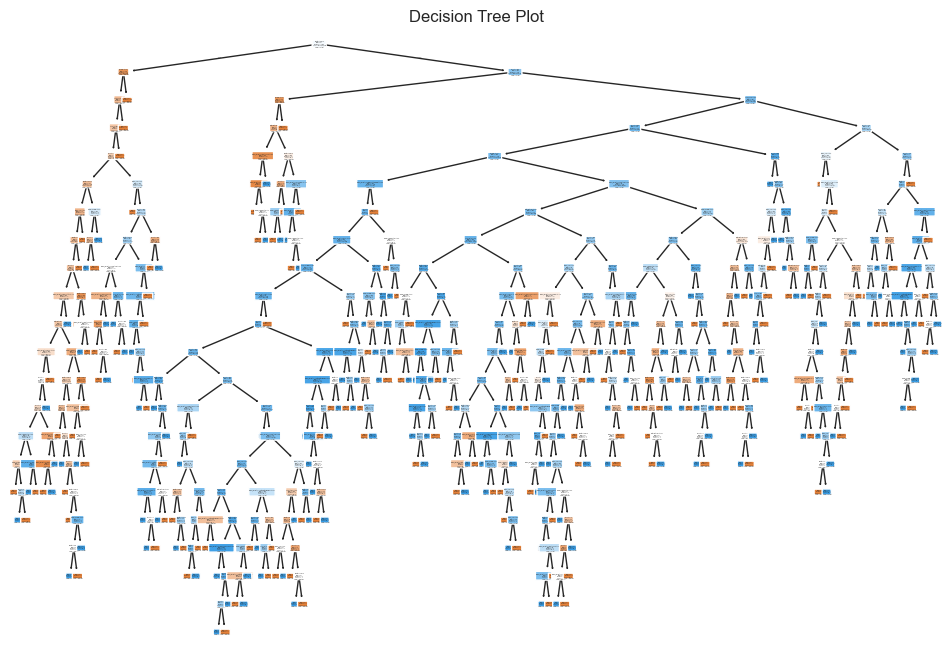

In [235]:
# Imprime el arbol 

# Muestra el arbol de desicion usanfo plot_tree

plt.figure(figsize=(12, 8)) 
plot_tree(clf, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Decline', 'Admit'])
plt.title('Decision Tree Plot')
plt.show()

### Evaluacion

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       287
         1.0       0.68      0.64      0.66       253

    accuracy                           0.69       540
   macro avg       0.69      0.69      0.69       540
weighted avg       0.69      0.69      0.69       540

AUC-ROC: 0.69



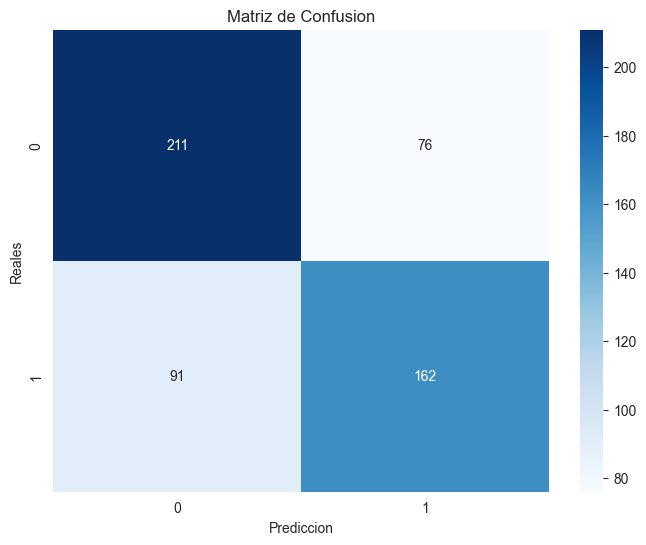

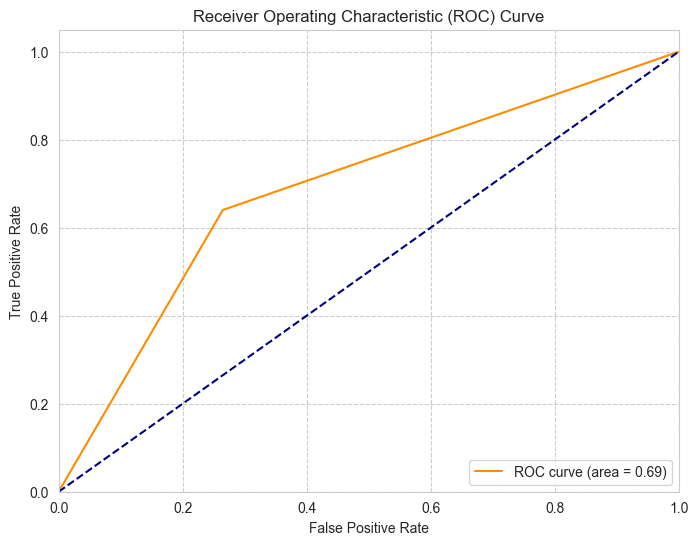

In [236]:
# Evalua el modelo 

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# resultados de salida

print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(class_report)
print(f"AUC-ROC: {roc_auc:.2f}\n")

# Muestra la matriz de confusion usando un mapa de calor

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusion')
plt.ylabel('Reales')
plt.xlabel('Prediccion')
plt.show()


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Metodo CCP

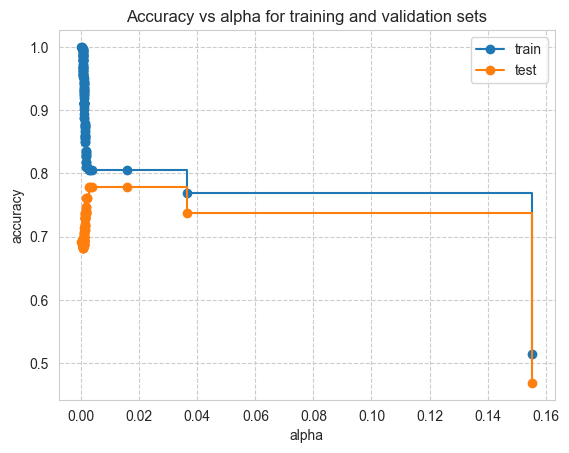

Best Alpha: 0.015880893300248132
Test Accuracy: 77.778%


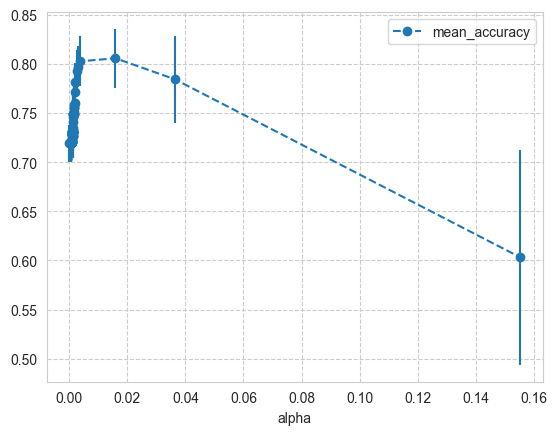

In [237]:
# Arbol de desicion con CCP

# Entrenar un arbol de desicion para obtener ccp_alphas
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener los alfas efectivos y las impurezas totales de las hojas correspondientes
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Arbol de desicion con CCP

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Cree una matriz para almacenar los resultados de cada pliegue durante la validación cruzada

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

# Encuentra e imprime el mejor resultado de alpha
best_alpha = alpha_results[alpha_results['mean_accuracy'] == max(alpha_results['mean_accuracy'])]['alpha'].values[0]
print("Best Alpha:", best_alpha)

# Entrena el modelo con el mejor resultado de alpha
clf_dtr_ccp = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_dtr_ccp.fit(X_train, y_train)

y_pred_ccp = clf_dtr_ccp.predict(X_test)
test_ccp_accuracy = accuracy_score(y_test, y_pred_ccp)
print(f"Test Accuracy: {test_ccp_accuracy:.3%}")



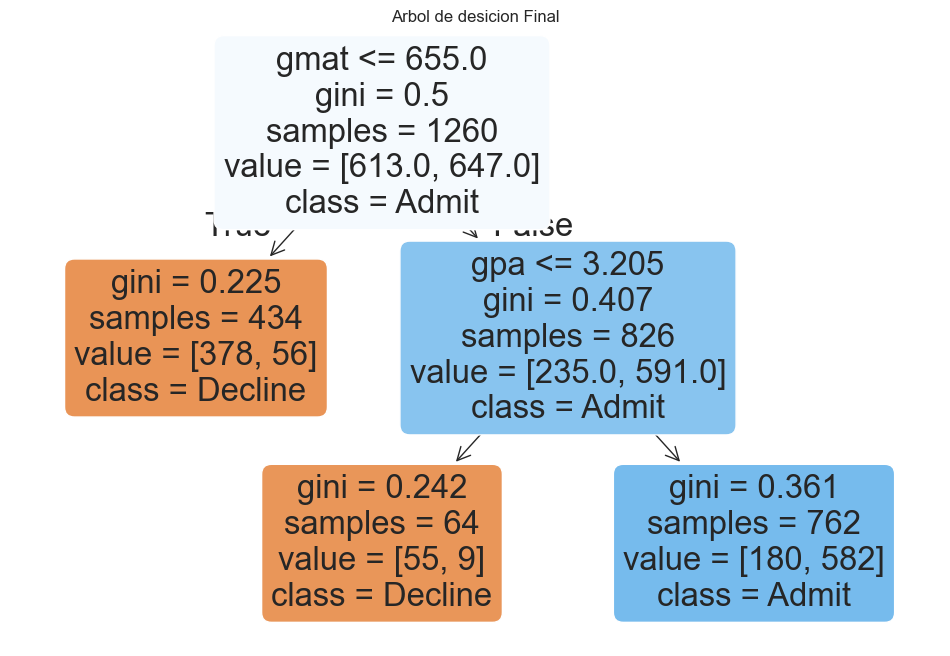

In [238]:
# Imprime el arbol
# muestra el arbol 

plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(clf_dtr_ccp, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Decline', 'Admit'])
plt.title('Arbol de desicion Final')
plt.show()

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.69      0.77       287
         1.0       0.72      0.87      0.79       253

    accuracy                           0.78       540
   macro avg       0.79      0.78      0.78       540
weighted avg       0.79      0.78      0.78       540

AUC-ROC: 0.78


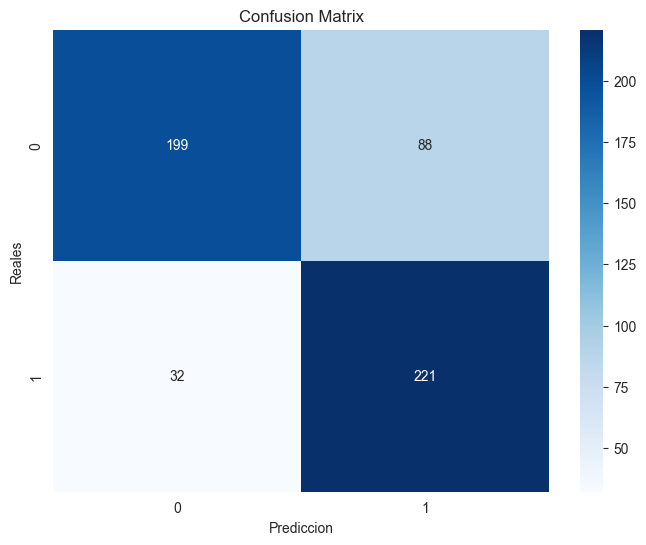

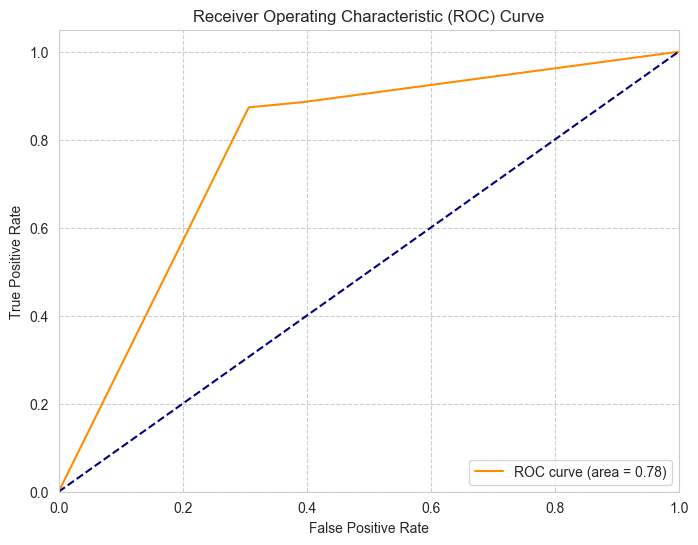

In [239]:
# Predicciones con la data de test
y_pred = clf_dtr_ccp.predict(X_test)
y_prob = clf_dtr_ccp.predict_proba(X_test)[:, 1]

# Evalua el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Muestra los resultados
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)
print(f"AUC-ROC: {roc_auc:.2f}")

# Muestra la matriz de confusion
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Reales')
plt.xlabel('Prediccion')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [240]:
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,False,3.30,Business,Asian,620,3,Financial Services,1.0
1,1,False,3.28,Humanities,Black,680,5,Investment Management,0.0
2,0,True,3.30,Business,NaN,710,5,Technology,1.0
3,1,False,3.47,STEM,Black,690,6,Technology,0.0
4,1,False,3.35,STEM,Hispanic,590,5,Consulting,0.0
